In [86]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import jaccard_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score

# Preparation

In [58]:
data = pd.read_csv('Tashkent_uy_narxlari.csv')
data

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [59]:
data.price = pd.to_numeric(data.price,errors = 'coerce')
data.rooms = pd.to_numeric(data.rooms,errors = 'coerce')
data['size'] = pd.to_numeric(data['size'],errors = 'coerce')
data.level = pd.to_numeric(data.level,errors = 'coerce')
data.max_levels = pd.to_numeric(data.max_levels,errors = 'coerce')

In [60]:
data = data.drop_duplicates()

In [61]:
data = data.drop('location',axis=1)

In [62]:
data = data[(data.price >= 10000) & (data.price < 400000) ]
data = data[(data['size'] > 15) & (data['size'] < 400) ]

In [63]:
data

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [64]:
data.isnull().sum()

district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

# Visualization

1.Bektemir
2.Chilanzar
3.Yashnobod
4.Mirobod
5.Mirzo Ulugbek
6.Sergeli
7.Shaykhontohur
8.Olmazar
9.Uchtepa
10.Yakkasaray
11.Yunusabad
<img src="Tashkent_City_districts.png" weight='40' height='20'/>

In [132]:
type(for_barplot)

pandas.core.series.Series

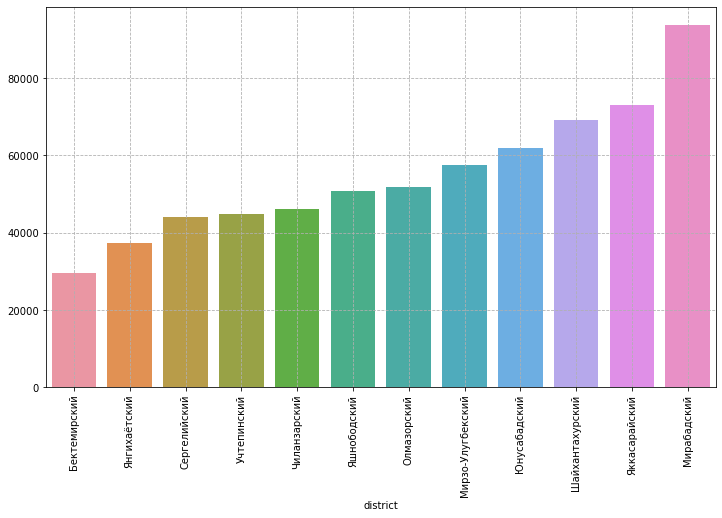

In [65]:
plt.figure(figsize=(12,7))
for_barplot = data.groupby('district')['price'].mean().sort_values()
sns.barplot(x=for_barplot.index,y=for_barplot.values)
plt.grid(linestyle='--')
plt.xticks(rotation=90)
plt.show()

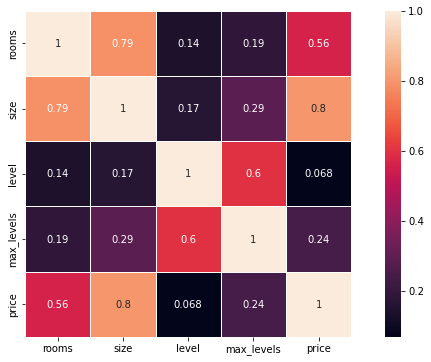

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,square=True,linewidths=1)
plt.show()

In [66]:
data.corrwith(data['price'])

rooms         0.562024
size          0.797672
level         0.068202
max_levels    0.240486
price         1.000000
dtype: float64

# Label tayyorlash

In [52]:
data.describe()

,rooms,size,level,max_levels,price
count,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000
mean,2.616324,72.926129,3.710903,6.048853,58597.382633
std,1.058237,35.119217,2.256852,2.621059,42102.336102
min,1.000000,16.000000,1.000000,1.000000,10000.000000
25%,2.000000,50.000000,2.000000,4.000000,35000.000000
50%,3.000000,66.000000,3.000000,5.000000,46500.000000
75%,3.000000,85.000000,5.000000,9.000000,67000.000000
max,10.000000,360.000000,19.000000,25.000000,395000.000000


#### Label tayyorlashni har xil statistika usullari bilan ko'rib chiqamiz

In [67]:
label_district = pd.DataFrame(data.groupby('district')['price'].mean())
label_district['label_d_median'] = data.groupby('district')['price'].median().values
label_district['label_d_std'] = data.groupby('district')['price'].std().values

label_district['label_d_mean'] = label_district['price']/max(label_district['price'])
label_district['label_d_median'] = label_district['label_d_median']/max(label_district['label_d_median'])
label_district['label_d_std'] = label_district['label_d_std']/max(label_district['label_d_std'])

label_district

,price,label_d_median,label_d_std,label_d_mean
district,,,,
Бектемирский,29462.500000,0.364286,0.100040,0.313879
Мирабадский,93865.862717,1.000000,1.000000,1.000000
Мирзо-Улугбекский,57444.816667,0.590909,0.668288,0.611988
Олмазорский,51869.048387,0.551948,0.511706,0.552587
Сергелийский,44140.108108,0.532468,0.305178,0.470247
Учтепинский,44844.382093,0.545455,0.257413,0.477750
Чиланзарский,46061.046843,0.506494,0.402724,0.490711
Шайхантахурский,69063.834808,0.727273,0.675672,0.735772
Юнусабадский,61876.996292,0.649351,0.699306,0.659207


In [68]:
label_district.isnull().sum()

price             0
label_d_median    0
label_d_std       0
label_d_mean      0
dtype: int64

## Preprocessing

In [69]:
data['label_d_median'] = [label_district.loc[i]['label_d_median'] for i in data['district']]
data['label_d_std'] = [label_district.loc[i]['label_d_std'] for i in data['district']]
data['label_d_mean'] = [label_district.loc[i]['label_d_mean'] for i in data['district']]
data

,district,rooms,size,level,max_levels,price,label_d_median,label_d_std,label_d_mean
0,Юнусабадский,3,57.0,4,4,52000.0,0.649351,0.699306,0.659207
1,Яккасарайский,2,52.0,4,5,56000.0,0.727273,0.813945,0.777844
2,Чиланзарский,2,42.0,4,4,37000.0,0.506494,0.402724,0.490711
3,Чиланзарский,3,65.0,1,4,49500.0,0.506494,0.402724,0.490711
4,Чиланзарский,3,70.0,3,5,55000.0,0.506494,0.402724,0.490711
...,...,...,...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0,0.519481,0.612251,0.540661
7561,Яшнободский,2,49.0,1,4,32000.0,0.519481,0.612251,0.540661
7562,Шайхантахурский,2,64.0,3,9,40000.0,0.727273,0.675672,0.735772
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0,0.590909,0.668288,0.611988


## Normalization 

MinMaxScaler va StandartScaler bilan normalizatsiya qilmoqchi edim nan va manfiy qiymatlar ko'payib ketdi.Shuning uchun qo'lda normalizatsiya qildim

In [70]:
data = data.drop('district',axis=1)
data['rooms'] /= max(data['rooms'])
data['size'] /= max(data['size'])
data['level'] /= max(data['level'])
data['max_levels'] /= max(data['max_levels'])
data['price'] /= max(data['price'])
data

,rooms,size,level,max_levels,price,label_d_median,label_d_std,label_d_mean
0,0.3,0.158333,0.210526,0.16,0.131646,0.649351,0.699306,0.659207
1,0.2,0.144444,0.210526,0.20,0.141772,0.727273,0.813945,0.777844
2,0.2,0.116667,0.210526,0.16,0.093671,0.506494,0.402724,0.490711
3,0.3,0.180556,0.052632,0.16,0.125316,0.506494,0.402724,0.490711
4,0.3,0.194444,0.157895,0.20,0.139241,0.506494,0.402724,0.490711
...,...,...,...,...,...,...,...,...
7560,0.1,0.105556,0.263158,0.20,0.062025,0.519481,0.612251,0.540661
7561,0.2,0.136111,0.052632,0.16,0.081013,0.519481,0.612251,0.540661
7562,0.2,0.177778,0.157895,0.36,0.101266,0.727273,0.675672,0.735772
7563,0.1,0.050000,0.052632,0.16,0.027848,0.590909,0.668288,0.611988


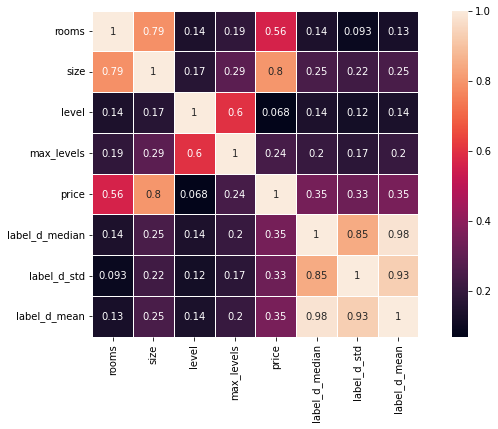

In [144]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,square=True,linewidths=1)
plt.show()

## Modeling with Regressions

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [160]:
#linear regression
from sklearn.linear_model import LinearRegression

In [161]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [165]:
lr_score = lr_model.score(x_test,y_test)
lr_score

0.6259433628515417

In [80]:
#K-NN
from sklearn.neighbors import KNeighborsRegressor

In [166]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [167]:
knn_score = knn_model.score(x_test,y_test)
knn_score

0.632746323904761

In [98]:
#SVM
from sklearn.svm import SVR

In [99]:
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [100]:
svr_score = svr_model.score(x_test,y_test)
svr_score

0.5640653496795723

In [104]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [105]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [106]:
dt_score = dt_model.score(x_test,y_test)
dt_score

0.5416046154350678

In [109]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [110]:
gb_model = GradientBoostingRegressor()
gb_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [111]:
gb_score = gb_model.score(x_test,y_test)
gb_score

0.6992107395505525

In [113]:
#Ada Boosting
from sklearn.ensemble import AdaBoostRegressor

In [114]:
ada_model = AdaBoostRegressor()
ada_model.fit(x_train,y_train)

AdaBoostRegressor()

In [115]:
ada_score = ada_model.score(x_test,y_test)
ada_score

0.5087476155243515

In [116]:
#Extra Tree
from sklearn.ensemble import ExtraTreesRegressor

In [117]:
et_model = ExtraTreesRegressor()
et_model.fit(x_train,y_train)

ExtraTreesRegressor()

In [118]:
et_score = et_model.score(x_test,y_test)
et_score

0.6893112725196762

In [119]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [120]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [121]:
rf_score = rf_model.score(x_test,y_test)
rf_score

0.7055395903876522

## Solishtirish

In [145]:
comparison_df = pd.Series({
    'Linear_R' : lr_score,
    'K-NN' : knn_score,
    'SVM' : svr_score,
    'Decision_T' : dt_score,
    'Gradient_B' : gb_score,
    'Ada_B' : ada_score,
    'Extra_T' : et_score,
    'Random_F' : rf_score
})
comparison_df = comparison_df.sort_values()
comparison_df

Ada_B         0.508748
Decision_T    0.541605
SVM           0.564065
Linear_R      0.625943
K-NN          0.632746
Extra_T       0.689311
Gradient_B    0.699211
Random_F      0.705540
dtype: float64

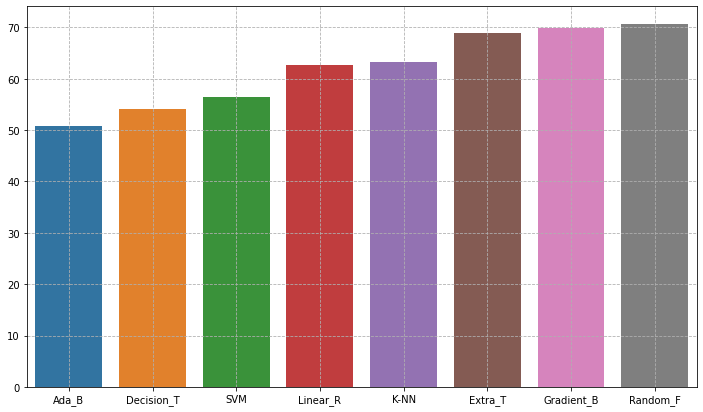

In [146]:
plt.figure(figsize=(12,7))
sns.barplot(x=comparison_df.index,y=comparison_df.values*100)
plt.grid(linestyle='--')
plt.show()

# Xulosa

Qo'lda label yasash unchalik foyda bermadi.Multiple linear regression algoritmlaridan foydalanganda eng katta accuracy Random Forest Regression da bo'ldi(acc=70%).Modelni single size va price bo'yicha linear regression bilan qilsak accuracy yaxshiroq bo'larkan.Chunki single linear regressionda datasetni burchak bo'yicha normalizatsiya qilsa bo'ladi.Lekin datasetni qanday ma'lumotlardan foydalanganimizni bilmay qolamiz.Ma'lumotning o'chib ketishi tga ning qiymatiga bog'liq(tga=data['price']/data['size]).Bu usuldan foydalanib modelni qo'ldan kelgancha chiziqli qilsa bo'ladi.Lekin dataset chiziqli bo'lmasa juda ko'p ma'lumotlar o'chib ketadi.Predict qilganda kiritilgan ma'lumotning tangensi train qilgandagi burchak bo'yicha normalizatsiya qilingan datasetga to'g'ri kelmasa xatolik katta bo'lishi mumkin